In [ ]:
'''
this is a mixed technique i reached betwwen the 'readmrz' library and openCV library
- it's more accurate way to detect mrz code 
- it solves the problem of the quality of image 
- it also solves the problem of passport location inside the image
but it has a problem because 
- it depends on fixed cropping area (bottom area in passport)
- also the rotation of image to the right position to make the mrz code at the bottom it's not accurate.
'''

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install matplotlib
!pip install readmrz

In [ ]:
import cv2
import matplotlib.pyplot as plt
from readmrz import MrzDetector, MrzReader
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


In [ ]:
detector = MrzDetector()  #A class which have functions to detect the mrz code

reader = MrzReader() #A class which have functions to read the mrz code

In [ ]:
img = cv2.imread('1.jpg',0) #read image in greyscale mode 

img_copy = img.copy()
img_canny = cv2.Canny(img_copy, 50, 100, apertureSize = 3) #apply canny filter to detect edges in our image 

In [ ]:
# apply HoughLines filter to map out the shape of passport area

img_hough = cv2.HoughLinesP(img_canny, 1,    
                            math.pi / 180, 100, 
                            minLineLength = 100, 
                            maxLineGap = 10)

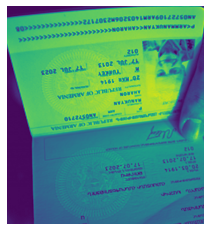

In [ ]:
#crop our passport area by the outer edges of detected lines:

(x, y, w, h) = (np.amin(img_hough, axis = 0)[0,0], np.amin(img_hough, axis = 0)[0,1], np.amax(img_hough, axis = 0)[0,0] - np.amin(img_hough, axis = 0)[0,0], np.amax(img_hough, axis = 0)[0,1] - np.amin(img_hough, axis = 0)[0,1])
img_roi = img_copy[y:y+h,x:x+w]

plt.imshow(img_copy[y:y+h,x:x+w])
plt.axis('off');
plt.show()

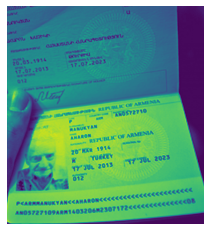

In [ ]:
#if the passport is rotated the rotate it to original shape
img_roi = cv2.rotate(img_roi, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(img_roi)
plt.axis('off');
plt.show()

In [ ]:
'''
The MRZ two lines code are always at the bottom of the passport document.
so we can focus on the bottom part of the passport 
'''

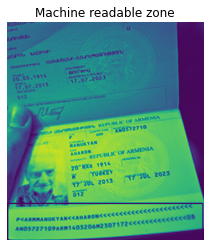

In [ ]:
#detect the mrz code
(height, width) = img_roi.shape
img_roi_copy = img_roi.copy()
dim_mrz = (x, y, w, h) = (1, round(height*0.83), width-4, round(height-(height*0.8))-4)

img_roi_copy = cv2.rectangle(img_roi_copy, (x, y), (x + w ,y + h),(0,0,0),2)

plt.imshow(img_roi_copy)
plt.title('Machine readable zone')
plt.axis('off');
plt.show()

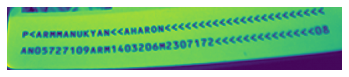

In [ ]:
plt.imshow(img_roi[y:y+h, x:x+w])
plt.axis('off');

In [ ]:
code = reader.read_mrz(img_roi[y:y+h, x:x+w])
print(code)

<<<<<<<<
<<<<<<<<<<<
<<<<08
F<4
RRRANUKYAN<<AHARON<<<<


In [ ]:
#write the output code to a txt file and save it
file = open("result.txt", "w")
a = file.write(code)
file.close()